In [2]:
import xrfdc
import xrfclk
from pynq import Overlay

In [3]:
ol=Overlay('dac_adc_loopback_3.bit')

In [4]:
xrfclk.set_all_ref_clks(409.6)

In [5]:
rfdc_1=ol.usp_rf_data_converter_0
dac_tile = rfdc_1.dac_tiles[1]
dac_tile.PLLConfig

{'Enabled': 1,
 'RefClkFreq': 409.6,
 'SampleRate': 1.024,
 'RefClkDivider': 1,
 'FeedbackDivider': 25,
 'OutputDivider': 10,
 'FractionalMode': 0,
 'FractionalData': 0,
 'FractWidth': 0}

In [6]:
dac_block = dac_tile.blocks[2]
dac_block.MixerSettings

{'Freq': 0.0,
 'PhaseOffset': 0.0,
 'EventSource': 2,
 'CoarseMixFreq': 16,
 'MixerMode': 4,
 'FineMixerScale': 0,
 'MixerType': 1}

In [7]:
adc_tile = rfdc_1.adc_tiles[0]
adc_tile.PLLConfig

{'Enabled': 1,
 'RefClkFreq': 409.6,
 'SampleRate': 1.024,
 'RefClkDivider': 1,
 'FeedbackDivider': 25,
 'OutputDivider': 10,
 'FractionalMode': 0,
 'FractionalData': 0,
 'FractWidth': 0}

In [8]:
adc_block = adc_tile.blocks[0]
adc_block.MixerSettings

{'Freq': 0.0,
 'PhaseOffset': 0.0,
 'EventSource': 2,
 'CoarseMixFreq': 16,
 'MixerMode': 4,
 'FineMixerScale': 0,
 'MixerType': 1}

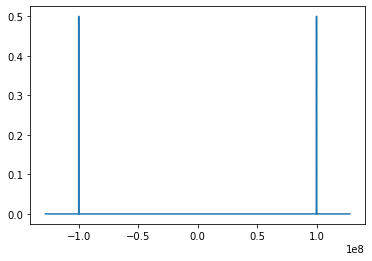

In [9]:
import numpy as np

from pynq import allocate
from matplotlib import pyplot as plt


ns=8192 # No of samples
fs=256000000
f=100000000
n=16
T=1*ns/fs;
t=np.arange(0,T,1/fs)
signal_float=np.cos(2*np.pi*f*t)
signal_int=np.int16(signal_float*(2**(n-1) - 1))
N_FFT=8192
fft=np.fft.fft(signal_int,N_FFT)
fft_freq=np.fft.fftfreq(N_FFT,1/fs)
fft_shift=np.fft.fftshift(fft)/8192/(2**(n-1))
fft_freq=np.fft.fftshift(fft_freq)
fft_abs=np.abs(fft_shift)
plt.plot(fft_freq,fft_abs)

In [12]:
rfdc_dac_data=ol.axi_dma_dac
rfdc_adc_data=ol.axi_dma_adc
input_buffer=allocate((8192,),dtype=np.int16)
output_buffer=allocate((8192,),dtype=np.int16)

In [13]:
output=np.array([0]*8192,dtype=np.int16)

In [14]:
np.copyto(input_buffer,signal_int)

In [15]:
send_channel=rfdc_dac_data.sendchannel
recv_channel=rfdc_adc_data.recvchannel

In [16]:
for i in range(10000):
    send_channel.transfer(input_buffer)
    recv_channel.transfer(output_buffer)
    send_channel.wait()
    recv_channel.wait()
   

In [17]:
np.copyto(output,output_buffer)

In [18]:
print(output)

[-17  18 -20 ...  52 -43  33]


In [19]:
print(signal_int)

[ 32767 -25329   6392 ...  15446   6392 -25329]


In [20]:
output[0:50]

array([ -17,   18,  -20,  -45,    7,    1,   34,  -48,  127,  -82,  -29,
         40,  -95,   86,   34,  -17,  117, -112,   74,   35,  -22,   93,
        -74,   82,   38,  -73,   40, -103,  -44,   30, -131,   67,  -51,
         41,   47,  -82,   92,   26,    0,   55,  -86,    5,   11,  -41,
         69,  -62,   38,  -14,  -38,   68], dtype=int16)

7295
99968750.0


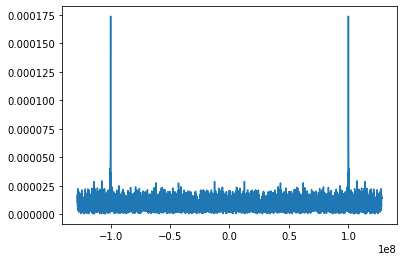

In [21]:
fs=256000000
N_FFT=8192
output_fft=np.fft.fft(output,N_FFT)
output_fft_freq=np.fft.fftfreq(N_FFT,1/fs)
output_fft_shift=np.fft.fftshift(output_fft)/8192/(2**(n-1))
output_fft_freq=np.fft.fftshift(output_fft_freq)
output_fft_abs=np.abs(output_fft_shift)
plt.plot(output_fft_freq,output_fft_abs)
print(np.argmax(output_fft_abs))
print(output_fft_freq[np.argmax(output_fft_abs)])

In [22]:
print(output)

[-17  18 -20 ...  52 -43  33]


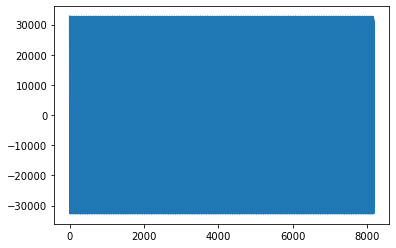

In [23]:
plt.plot(signal_int)

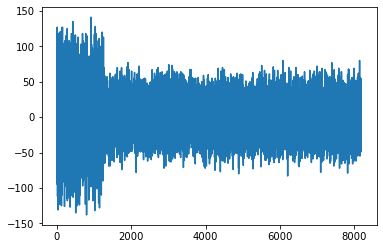

In [24]:
plt.plot(output)